# USE CASE 2: HIERARCHICAL CLUSTERING

The given use case is based on Hierarchical clustering. We use the MNIST dataset which is a dataset for handwritten images. First we import the dataset and then carry out embedding in 2D using spectral embedding. We carry out the merges using different linkage criteria: ward linkage, average linkage and complete linkage. Then we plot the dendrogram. Then we carry out visualization of number of clusters by assuming distance between points as 20. 
N.B.: Since the model is computationally intensive, we work on a dataset of 500 points instead of 60000 points (for practice).

In [3]:
# import the dataset

In [4]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as sns
from time import time
from sklearn import manifold, datasets

In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

/opt/usr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# shape of the dataset

In [37]:
x_train[:][:][:].shape

(60000, 28, 28)

In [38]:
y_train.shape

(60000,)

In [7]:
x_test[:][:][:].shape

(10000, 28, 28)

In [40]:
y_test.shape

(10000,)

In [8]:
# Spectral Embedding libraries

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding as sp
from scipy.cluster.hierarchy import dendrogram, linkage

In [10]:
from scipy import ndimage

In [11]:
from sklearn import manifold, datasets

In [12]:
X1 = x_test.reshape(10000,-1)

In [13]:
X1.shape

(10000, 784)

In [14]:
X2 = X1[:500,:]

In [15]:
X2.shape

(500, 784)

In [16]:
Y = y_test[:500]

In [17]:
Y.shape

(500,)

In [18]:
np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((28, 28)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X2, Y)


In [19]:
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

In [20]:
# 2d embedding, linkages and plotting of dataset

Computing embedding
Done.
ward : 0.01s
average : 0.01s
complete : 0.01s


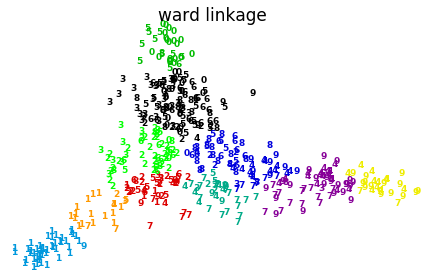

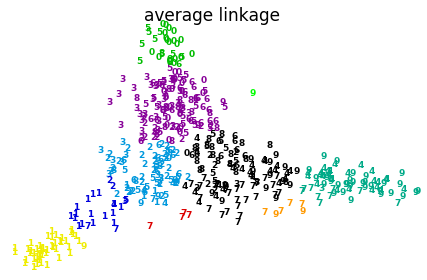

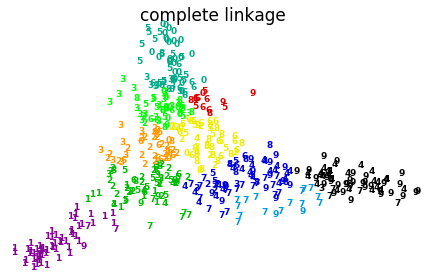

In [21]:
# 2D embedding of the dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X2)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [22]:
# Plot Dendrodram

In [23]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

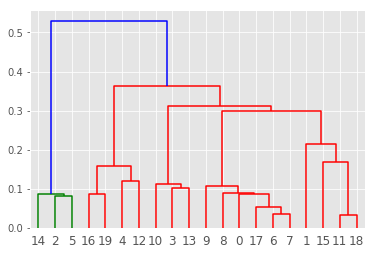

In [24]:
Z = hierarchy.linkage(X_red[:20,:], 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [25]:
X_red.shape

(500, 2)

In [26]:
X2.shape

(500, 784)

In [27]:
# Distance between points <= 20 in one cluster

In [29]:
import scipy

In [30]:
Z1 = hierarchy.linkage(X_red[:500,:], 'single')

In [31]:
labels = scipy.cluster.hierarchy.fcluster(Z1, 20, criterion='distance', depth=2, R=None, monocrit=None)

In [32]:
labels.shape

(500,)

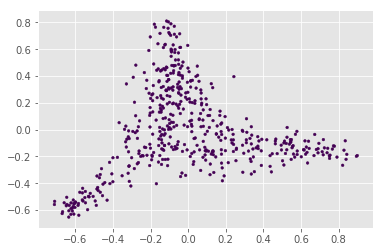

In [33]:
plt.scatter(X_red[:,0], X_red[:,1], c=labels, s=7)

In [34]:
X_red

array([[ 2.13011598e-01, -2.46971727e-01],
       [-2.03038306e-01,  1.92347688e-02],
       [-5.60998769e-01, -4.38247645e-01],
       [-4.38590208e-02,  6.13260501e-01],
       [ 6.20677305e-01, -8.42097328e-02],
       [-4.80994733e-01, -4.32072753e-01],
       [ 2.41247975e-01, -1.10644358e-01],
       [ 2.40291384e-01, -7.66080026e-02],
       [ 1.75004168e-01, -1.43996286e-02],
       [ 1.32750978e-01, -1.64336069e-01],
       [-1.60793851e-01,  6.40770304e-01],
       [-5.49513688e-02,  1.75991601e-01],
       [ 6.01266455e-01, -2.03068242e-01],
       [-7.33867267e-02,  7.11641361e-01],
       [-5.62797890e-01, -5.25391634e-01],
       [-1.85473126e-01,  3.28880357e-01],
       [ 7.66491012e-01, -1.45471211e-01],
       [ 2.40327070e-01, -1.63539010e-01],
       [-7.85847274e-02,  1.97563478e-01],
       [ 8.43160353e-01, -1.84804063e-01],
       [ 7.85864363e-02, -2.06891608e-01],
       [ 4.91993930e-03,  4.31920487e-01],
       [-5.32605486e-02, -9.03706159e-02],
       [-3.

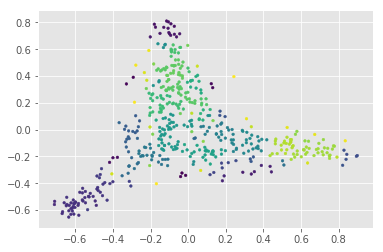

In [35]:
labels1 = scipy.cluster.hierarchy.fcluster(Z1, 0.03, criterion='distance', depth=2, R=None, monocrit=None)
labels1.shape
plt.scatter(X_red[:,0], X_red[:,1], c=labels1, s=7)